In [10]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [11]:
train=pd.read_csv(r"/Users/harithatamvada/soil-classification/train2.csv")
#test=pd.read_csv(r"/Users/htamvada/plant-pathology-2020/test.csv")

In [12]:
train.head()

,,,,Table 1
Sample,Sand,Silt,Clay,Type
1,0,10,90,Clay
2,0,17,83,Clay
3,0,5,95,Clay
4,0,5,95,Clay


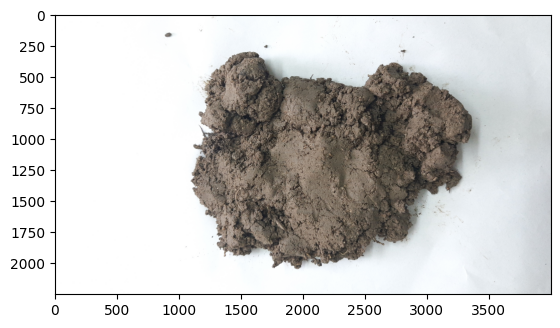

In [14]:
image1=Image.open(r'/Users/harithatamvada/soil-classification/images2/train/Sample15.jpg')
plt.imshow(image1)
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam

In [16]:
IMG_SIZE = 224

In [17]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

/Users/harithatamvada/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
checkpoint=ModelCheckpoint(r'/Users/harithatamvada/soil-classification/models/apple2.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [20]:
labels = ['Clay', 'Sand', 'Loam', 'Silt']
data_dir = '/Users/harithatamvada/soil-classification/images2/train'

train = [] 
for label in labels: 
    path = os.path.join(data_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) # Reshaping images to preferred size
            train.append([resized_arr, class_num])
        except Exception as e:
            print(e)

In [21]:
val = [] 
for label in labels: 
    path = os.path.join(data_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) # Reshaping images to preferred size
            val.append([resized_arr, class_num])
        except Exception as e:
            print(e)

In [22]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

x_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [25]:
model_history = model.fit(x_train,y_train,epochs=500,validation_data=(x_val, y_val))

Epoch 1/500
4/4 [==============================] - 1s 152ms/step - loss: 0.3366 - accuracy: 0.2258 - val_loss: 0.3386 - val_accuracy: 0.2097
Epoch 2/500
4/4 [==============================] - 1s 152ms/step - loss: 0.3361 - accuracy: 0.2258 - val_loss: 0.3381 - val_accuracy: 0.2097
Epoch 3/500
4/4 [==============================] - 1s 143ms/step - loss: 0.3352 - accuracy: 0.2661 - val_loss: 0.3375 - val_accuracy: 0.1935
Epoch 4/500
4/4 [==============================] - 1s 144ms/step - loss: 0.3368 - accuracy: 0.1935 - val_loss: 0.3369 - val_accuracy: 0.1935
Epoch 5/500
4/4 [==============================] - 0s 136ms/step - loss: 0.3372 - accuracy: 0.1935 - val_loss: 0.3365 - val_accuracy: 0.2016
Epoch 6/500
4/4 [==============================] - 0s 135ms/step - loss: 0.3391 - accuracy: 0.2016 - val_loss: 0.3360 - val_accuracy: 0.2097
Epoch 7/500
4/4 [==============================] - 1s 139ms/step - loss: 0.3385 - accuracy: 0.1855 - val_loss: 0.3355 - val_accuracy: 0.2419
Epoch 8/500
4

Epoch 59/500
4/4 [==============================] - 0s 136ms/step - loss: 0.3198 - accuracy: 0.3548 - val_loss: 0.3218 - val_accuracy: 0.3468
Epoch 60/500
4/4 [==============================] - 0s 135ms/step - loss: 0.3201 - accuracy: 0.3387 - val_loss: 0.3216 - val_accuracy: 0.3548
Epoch 61/500
4/4 [==============================] - 0s 134ms/step - loss: 0.3197 - accuracy: 0.3306 - val_loss: 0.3215 - val_accuracy: 0.3629
Epoch 62/500
4/4 [==============================] - 0s 134ms/step - loss: 0.3191 - accuracy: 0.3710 - val_loss: 0.3212 - val_accuracy: 0.3629
Epoch 63/500
4/4 [==============================] - 0s 135ms/step - loss: 0.3212 - accuracy: 0.3306 - val_loss: 0.3210 - val_accuracy: 0.3629
Epoch 64/500
4/4 [==============================] - 0s 135ms/step - loss: 0.3178 - accuracy: 0.3548 - val_loss: 0.3208 - val_accuracy: 0.3629
Epoch 65/500
4/4 [==============================] - 0s 134ms/step - loss: 0.3211 - accuracy: 0.3065 - val_loss: 0.3206 - val_accuracy: 0.3710
Epoch 

4/4 [==============================] - 0s 135ms/step - loss: 0.3049 - accuracy: 0.3790 - val_loss: 0.3089 - val_accuracy: 0.3548
Epoch 117/500
4/4 [==============================] - 0s 135ms/step - loss: 0.3093 - accuracy: 0.3790 - val_loss: 0.3086 - val_accuracy: 0.3548
Epoch 118/500
4/4 [==============================] - 0s 134ms/step - loss: 0.3120 - accuracy: 0.3548 - val_loss: 0.3084 - val_accuracy: 0.3548
Epoch 119/500
4/4 [==============================] - 0s 134ms/step - loss: 0.3126 - accuracy: 0.3387 - val_loss: 0.3081 - val_accuracy: 0.3548
Epoch 120/500
4/4 [==============================] - 0s 136ms/step - loss: 0.3095 - accuracy: 0.3548 - val_loss: 0.3079 - val_accuracy: 0.3629
Epoch 121/500
4/4 [==============================] - 1s 150ms/step - loss: 0.3103 - accuracy: 0.3468 - val_loss: 0.3077 - val_accuracy: 0.3629
Epoch 122/500
4/4 [==============================] - 1s 144ms/step - loss: 0.3047 - accuracy: 0.3629 - val_loss: 0.3075 - val_accuracy: 0.3629
Epoch 123/500

4/4 [==============================] - 0s 135ms/step - loss: 0.2953 - accuracy: 0.3790 - val_loss: 0.2938 - val_accuracy: 0.3871
Epoch 174/500
4/4 [==============================] - 0s 135ms/step - loss: 0.3018 - accuracy: 0.3871 - val_loss: 0.2935 - val_accuracy: 0.3871
Epoch 175/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2960 - accuracy: 0.3952 - val_loss: 0.2932 - val_accuracy: 0.3871
Epoch 176/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2901 - accuracy: 0.3952 - val_loss: 0.2929 - val_accuracy: 0.3871
Epoch 177/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2933 - accuracy: 0.3871 - val_loss: 0.2925 - val_accuracy: 0.3871
Epoch 178/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2906 - accuracy: 0.3871 - val_loss: 0.2922 - val_accuracy: 0.3871
Epoch 179/500
4/4 [==============================] - 0s 134ms/step - loss: 0.2898 - accuracy: 0.3871 - val_loss: 0.2920 - val_accuracy: 0.3871
Epoch 180/500

4/4 [==============================] - 0s 135ms/step - loss: 0.2751 - accuracy: 0.3952 - val_loss: 0.2771 - val_accuracy: 0.3871
Epoch 231/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2722 - accuracy: 0.3790 - val_loss: 0.2768 - val_accuracy: 0.3871
Epoch 232/500
4/4 [==============================] - 1s 137ms/step - loss: 0.2752 - accuracy: 0.3871 - val_loss: 0.2765 - val_accuracy: 0.3871
Epoch 233/500
4/4 [==============================] - 0s 134ms/step - loss: 0.2754 - accuracy: 0.3871 - val_loss: 0.2763 - val_accuracy: 0.3871
Epoch 234/500
4/4 [==============================] - 0s 134ms/step - loss: 0.2814 - accuracy: 0.3710 - val_loss: 0.2761 - val_accuracy: 0.3871
Epoch 235/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2728 - accuracy: 0.3790 - val_loss: 0.2758 - val_accuracy: 0.3871
Epoch 236/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2751 - accuracy: 0.3871 - val_loss: 0.2755 - val_accuracy: 0.3871
Epoch 237/500

4/4 [==============================] - 1s 136ms/step - loss: 0.2612 - accuracy: 0.4032 - val_loss: 0.2617 - val_accuracy: 0.3871
Epoch 288/500
4/4 [==============================] - 1s 136ms/step - loss: 0.2638 - accuracy: 0.3871 - val_loss: 0.2614 - val_accuracy: 0.3952
Epoch 289/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2637 - accuracy: 0.3952 - val_loss: 0.2611 - val_accuracy: 0.3952
Epoch 290/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2644 - accuracy: 0.3790 - val_loss: 0.2608 - val_accuracy: 0.3952
Epoch 291/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2585 - accuracy: 0.4113 - val_loss: 0.2605 - val_accuracy: 0.3952
Epoch 292/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2642 - accuracy: 0.4032 - val_loss: 0.2603 - val_accuracy: 0.3952
Epoch 293/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2584 - accuracy: 0.3871 - val_loss: 0.2601 - val_accuracy: 0.3952
Epoch 294/500

4/4 [==============================] - 0s 135ms/step - loss: 0.2408 - accuracy: 0.4194 - val_loss: 0.2448 - val_accuracy: 0.4274
Epoch 345/500
4/4 [==============================] - 0s 136ms/step - loss: 0.2455 - accuracy: 0.4194 - val_loss: 0.2445 - val_accuracy: 0.4274
Epoch 346/500
4/4 [==============================] - 1s 137ms/step - loss: 0.2456 - accuracy: 0.4113 - val_loss: 0.2441 - val_accuracy: 0.4274
Epoch 347/500
4/4 [==============================] - 1s 136ms/step - loss: 0.2451 - accuracy: 0.4274 - val_loss: 0.2438 - val_accuracy: 0.4274
Epoch 348/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2430 - accuracy: 0.4113 - val_loss: 0.2434 - val_accuracy: 0.4194
Epoch 349/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2429 - accuracy: 0.4113 - val_loss: 0.2431 - val_accuracy: 0.4274
Epoch 350/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2407 - accuracy: 0.4516 - val_loss: 0.2427 - val_accuracy: 0.4274
Epoch 351/500

4/4 [==============================] - 1s 138ms/step - loss: 0.2257 - accuracy: 0.4032 - val_loss: 0.2282 - val_accuracy: 0.4274
Epoch 402/500
4/4 [==============================] - 1s 137ms/step - loss: 0.2299 - accuracy: 0.4194 - val_loss: 0.2279 - val_accuracy: 0.4355
Epoch 403/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2320 - accuracy: 0.4032 - val_loss: 0.2278 - val_accuracy: 0.4274
Epoch 404/500
4/4 [==============================] - 0s 134ms/step - loss: 0.2232 - accuracy: 0.4194 - val_loss: 0.2275 - val_accuracy: 0.4274
Epoch 405/500
4/4 [==============================] - 0s 136ms/step - loss: 0.2297 - accuracy: 0.4274 - val_loss: 0.2271 - val_accuracy: 0.4355
Epoch 406/500
4/4 [==============================] - 1s 139ms/step - loss: 0.2313 - accuracy: 0.4113 - val_loss: 0.2268 - val_accuracy: 0.4355
Epoch 407/500
4/4 [==============================] - 0s 136ms/step - loss: 0.2297 - accuracy: 0.4274 - val_loss: 0.2267 - val_accuracy: 0.4355
Epoch 408/500

4/4 [==============================] - 1s 136ms/step - loss: 0.2189 - accuracy: 0.4274 - val_loss: 0.2152 - val_accuracy: 0.4355
Epoch 459/500
4/4 [==============================] - 0s 134ms/step - loss: 0.2157 - accuracy: 0.4597 - val_loss: 0.2151 - val_accuracy: 0.4355
Epoch 460/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2211 - accuracy: 0.4274 - val_loss: 0.2148 - val_accuracy: 0.4355
Epoch 461/500
4/4 [==============================] - 0s 136ms/step - loss: 0.2170 - accuracy: 0.4032 - val_loss: 0.2147 - val_accuracy: 0.4355
Epoch 462/500
4/4 [==============================] - 1s 136ms/step - loss: 0.2127 - accuracy: 0.4355 - val_loss: 0.2145 - val_accuracy: 0.4355
Epoch 463/500
4/4 [==============================] - 1s 141ms/step - loss: 0.2074 - accuracy: 0.4435 - val_loss: 0.2143 - val_accuracy: 0.4355
Epoch 464/500
4/4 [==============================] - 0s 135ms/step - loss: 0.2127 - accuracy: 0.4355 - val_loss: 0.2141 - val_accuracy: 0.4355
Epoch 465/500

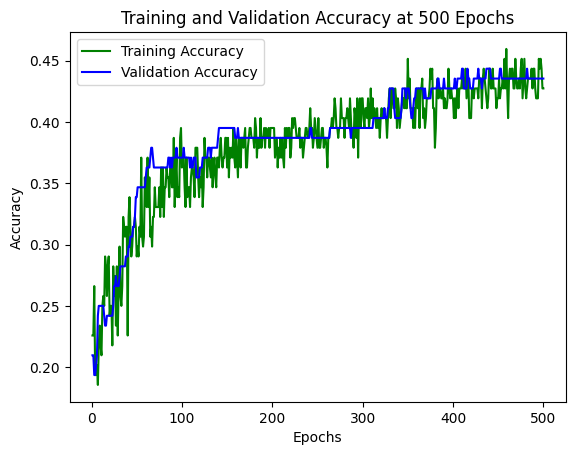

In [28]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,501)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy at 500 Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

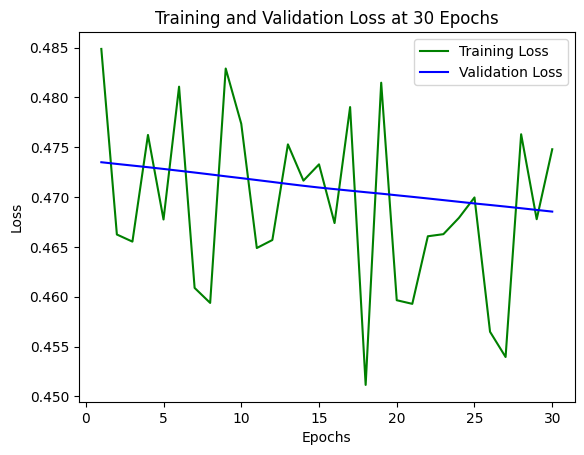

In [28]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss at 30 Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/rq/fttfpph53671nf5_9s4qnwlm0000gn/T/tmpxb9wf4s1/assets


INFO:tensorflow:Assets written to: /var/folders/rq/fttfpph53671nf5_9s4qnwlm0000gn/T/tmpxb9wf4s1/assets
2023-02-19 11:15:19.996629: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-19 11:15:19.996768: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-19 11:15:19.999737: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/rq/fttfpph53671nf5_9s4qnwlm0000gn/T/tmpxb9wf4s1
2023-02-19 11:15:20.000753: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-02-19 11:15:20.000759: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/rq/fttfpph53671nf5_9s4qnwlm0000gn/T/tmpxb9wf4s1
2023-02-19 11:15:20.006216: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-02-19 11:15:20.010340: I tensorflow/cc/saved_model/load